X-ray satellite σ = 1.39797180535 arcsec
Blue = numerical, red = theoretical


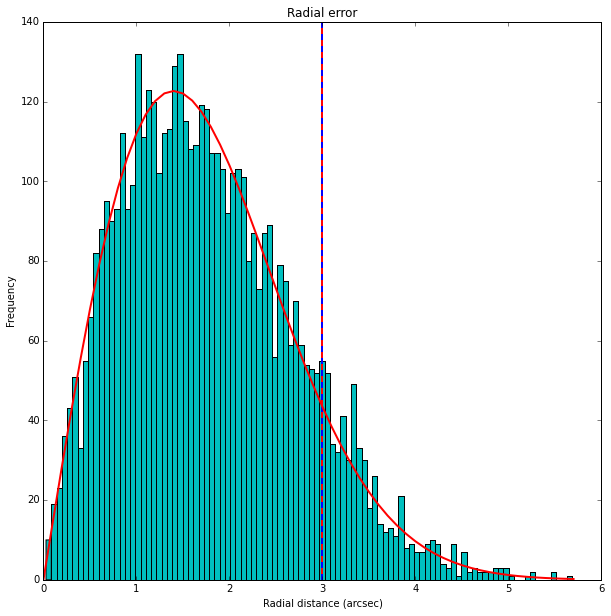

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456
"""

"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 3
Problem 1

Source positions for the Einstein X-ray satellite are quoted with a “90% 
error radius” of 3 arcseconds. Assume that the α (right ascension – think 
of this as the x coordinate) and δ (declination – the y coordinate) 
uncertainties are independent Gaussian random variables with zero mean and 
identical variance, σ^2 . 

(a) Both x and y are distributed as G(0, σ). You therefore know px(x) and 
py(y). Use the transformation of variables to calculate p r (r), where 
r = √(x^2 + y^2).
"""

# See pencilwork handed in

"""
(b) Given your answer to part (a) and the information given at the 
beginning of this question, what is the value of σ?
"""

# See pencilwork for this one, too
import numpy
sigma=(9/(2*numpy.log(10)))**(1/2)
print('X-ray satellite σ =',sigma,'arcsec')

"""
(c) Check your answer to part (b) by drawing 5000 samples each from x and 
y, each of which is distributed as G(0, σ), where σ is the value that you
found in part (b). Create ri = √(xi^2 + yi^2). Make a histogram plot of r, 
and find what percentage of the 5000 samples fall within r < 3.
"""

# Gaussian = stdev*normal + mean
xi=sigma*numpy.random.randn(5000)
yi=sigma*numpy.random.randn(5000)

ri= (xi**2 + yi**2)**(1/2)

from matplotlib import pyplot
%matplotlib inline

numberofbins=100
figure1=pyplot.figure(figsize=(10,10))
pyplot.hist(ri,bins=numberofbins,color='c')

# Theoretical 90%
pyplot.axvline(3,color='r',linewidth=2)

# Numerical 90%
percentage = 100*numpy.sum(ri<3)/ri.size # Should be ~90
pyplot.axvline(numpy.percentile(ri,percentage),linestyle='--',linewidth=2)
rt=numpy.arange(0,ri.max()+.1,.1)
yt= rt/sigma**2 * numpy.exp(-rt**2/(2*sigma**2))
pyplot.plot(rt,yt * ri.size * (ri.max()-ri.min())/numberofbins,color='r',
            linewidth=2)
# PDF * count * binwidth

print('Blue = numerical, red = theoretical')
pyplot.title('Radial error')
pyplot.xlabel('Radial distance (arcsec)')
pyplot.ylabel('Frequency')